<a href="https://colab.research.google.com/github/nulven/PrivacyML/blob/master/FInal_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd '/content/drive/MyDrive/final/MNIST'

/content/drive/MyDrive/final/MNIST


Preprocess data

In [3]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, datasets, models

In [4]:
np.random.seed(0)

In [12]:
import librosa
# audio_folder = '/content/drive/MyDrive/Internship/virufy-mfcc-dataset/covid_shared_data/audio'
audio_folder = '/home/nulven/privacyml/heartbeat_data/set_b'

audio = listdir(audio_folder)
# neg_audio = listdir(neg_audio_folder)

len(audio)

656

In [13]:
x , sr = librosa.load(join(audio_folder,audio[7]))
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [14]:
import IPython.display as ipd
ipd.Audio(join(audio_folder,audio[7]))

(20, 221)


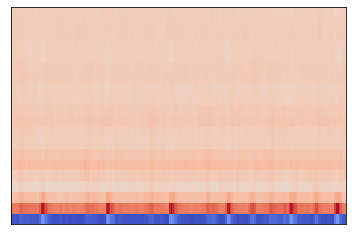

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr)

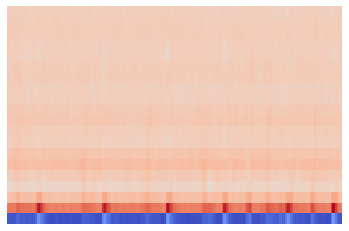

In [24]:
#Saving MFCC plots
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = display.specshow(mfccs, sr=sr)
plt.margins(0,0)
plt.axis('off')
plt.savefig('/home/nulven/privacyml/outputs/spec1.png',bbox_inches='tight',pad_inches = 0)

100%|██████████| 656/656 [40:30<00:00,  3.70s/it]


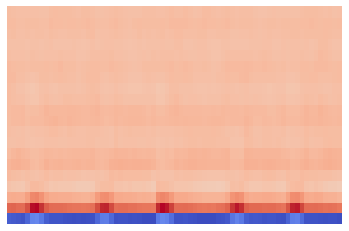

In [26]:
#Audio Plots
from tqdm import tqdm 
import time 

for aud in tqdm(audio):
  x , sr = librosa.load(audio_folder+'/'+aud)
  mfccs = librosa.feature.mfcc(x, sr=sr)
  fig = plt.Figure()
  canvas = FigureCanvas(fig)
  ax = fig.add_subplot(111)
  librosa.display.specshow(mfccs, sr=sr)
  plt.margins(0,0)
  plt.axis('off')
  plt.savefig('/home/nulven/privacyml/audio_plots/' + aud + '.png',bbox_inches='tight',pad_inches = 0)
  # time.sleep(0.01)

In [ ]:
#Dataset Path
images = '/home/nulven/privacyml/audio_plots/'

len(listdir(images))

In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
ds_trans = transforms.Compose([transforms.Resize(224),
                               transforms.ToTensor(),
                               normalize])

In [82]:
labels = pd.read_csv('/home/nulven/privacyml/heartbeat_data/set_b.csv')
labels = labels[['fname','label']]
labels = labels[labels['label'].notnull()]

In [83]:
# Mapping to numerical data
# test = {'covid': 1,'not_covid': 0}
test = {'normal': 0, 'murmur': 1, 'extrastole': 2}
  
labels.label = [test[item] for item in labels.label] 
labels

,fname,label
0,set_b/extrastole__127_1306764300147_C2.wav,2
1,set_b/extrastole__128_1306344005749_A.wav,2
2,set_b/extrastole__130_1306347376079_D.wav,2
3,set_b/extrastole__134_1306428161797_C1.wav,2
4,set_b/extrastole__138_1306762146980_B.wav,2
...,...,...
651,set_b/normal_noisynormal_284_1311168471850_A.wav,0
652,set_b/normal_noisynormal_284_1311168471850_B.wav,0
653,set_b/normal_noisynormal_285_1311169246969_C.wav,0
654,set_b/normal_noisynormal_296_1311682952647_C.wav,0


In [63]:
#Viewing Image
from IPython.display import Image
# Image(images+'pos-0422-096-cough-m-31-8.mp3.png')

In [ ]:
from torch.utils.data import Dataset
import pandas as pd
import os
from PIL import Image
import torch

class CovidCoughDataset(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.annotations = annotation_file
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_id = self.annotations.iloc[index, 0]
        img = Image.open(os.path.join(self.root_dir, img_id+'.png')).convert("RGB")
        y_label = torch.tensor(float(self.annotations.iloc[index, 1])).type(torch.LongTensor)

        if self.transform is not None:
            img = self.transform(img)

        return (img, y_label)


normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
ds_trans = transforms.Compose([transforms.Resize(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               normalize])

In [67]:
from torch.utils.data import Dataset
import pandas as pd
import os
from PIL import Image
import torch

class HeartbeatDataset(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.annotations = annotation_file
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_id = self.annotations.iloc[index, 0]
        img = Image.open(os.path.join(self.root_dir, img_id+'.png')).convert("RGB")
        y_label = torch.tensor(float(self.annotations.iloc[index, 1])).type(torch.LongTensor)

        if self.transform is not None:
            img = self.transform(img)

        return (img, y_label)


normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
ds_trans = transforms.Compose([transforms.Resize(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               normalize])

In [ ]:
dataset = CovidCoughDataset("/content/drive/MyDrive/Internship/audio_plots",labels,transform=ds_trans)

train_set, validation_set = torch.utils.data.random_split(dataset,[549,200])

train_dl = DataLoader(dataset=train_set, shuffle=True, batch_size=4,num_workers=4)
valid_dl = DataLoader(dataset=validation_set, shuffle=True, batch_size=4,num_workers=4)

In [84]:
dataset = HeartbeatDataset("/home/nulven/privacyml/audio_plots",labels,transform=ds_trans)

train_set, validation_set = torch.utils.data.random_split(dataset,[261,200])

train_dl = DataLoader(dataset=train_set, shuffle=True, batch_size=4,num_workers=4)
valid_dl = DataLoader(dataset=validation_set, shuffle=True, batch_size=4,num_workers=4)

torch.Size([4, 3, 224, 224]) torch.Size([4])


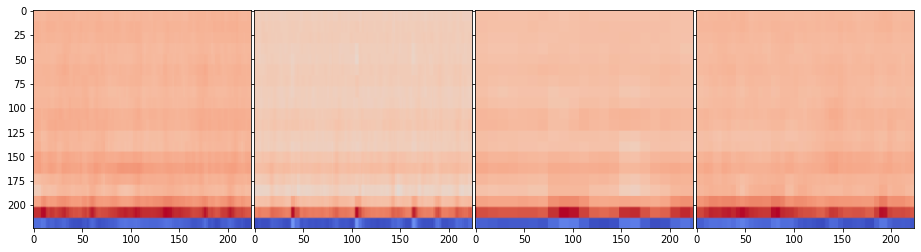

In [85]:
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    axis.imshow(inp)

img, label = next(iter(train_dl))
print(img.size(), label.size())
fig = plt.figure(1, figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 4), axes_pad=0.05)    
for i in range(img.size()[0]):
    ax = grid[i]
    imshow(ax, img[i])

In [86]:
use_gpu = torch.cuda.is_available()
resnet = models.resnet50(pretrained=True)
inputs, labels = next(iter(train_dl))
if use_gpu:
    resnet = resnet.cuda()
    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())   
else:
    inputs, labels = Variable(inputs), Variable(labels)
outputs = resnet(inputs)
outputs.size()

/home/nulven/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/nulven/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
def train_model(dataloders, model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    use_gpu = torch.cuda.is_available()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    dataset_sizes = {'train': len(dataloders['train'].dataset), 
                     'valid': len(dataloders['valid'].dataset)}

    for epoch in range(num_epochs):
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)
            else:
                model.train(False)

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloders[phase]:
                if use_gpu:
                    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)

                # print("F1 Score = {}, Precision = {}, Recall = {}".format(f1(labels,preds),precision(labels,preds),recall(labels,preds)))

                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.data
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                train_epoch_loss = running_loss / dataset_sizes[phase]
                train_epoch_acc = running_corrects / dataset_sizes[phase]
            else:
                valid_epoch_loss = running_loss / dataset_sizes[phase]
                valid_epoch_acc = running_corrects / dataset_sizes[phase]
                
            if phase == 'valid' and valid_epoch_acc > best_acc:
                best_acc = valid_epoch_acc
                best_model_wts = model.state_dict()

        print('Epoch [{}/{}] train loss: {:.4f} acc: {:.4f} ' 
              'valid loss: {:.4f} acc: {:.4f}'.format(
                epoch, num_epochs - 1,
                train_epoch_loss, train_epoch_acc, 
                valid_epoch_loss, valid_epoch_acc))
            
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [ ]:
resnet = models.resnet50(pretrained=True)
# freeze all model parameters
for param in resnet.parameters():
    param.requires_grad = False

# new final layer with 2 classes
num_ftrs = resnet.fc.in_features
resnet.fc = torch.nn.Linear(num_ftrs, 2)
if use_gpu:
    resnet = resnet.cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet.fc.parameters(), lr=0.05, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

dloaders = {'train':train_dl, 'valid':valid_dl}

In [ ]:
start_time = time.time()
model = train_model(dloaders, resnet, criterion, optimizer, exp_lr_scheduler, num_epochs=5)
print('Training time: {:10f} minutes'.format((time.time()-start_time)/60))

In [ ]:
!pip install pytorch-lightning

In [ ]:
from pytorch_lightning.metrics.classification import Precision, Recall, F1

precision = Precision(num_classes = 2)
recall = Recall()
f1 = F1(num_classes = 2)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import copy

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR, CosineAnnealingWarmRestarts
import torchvision
import torchvision.transforms as tt
import torchvision.models as models
from torchvision.datasets import MNIST, CIFAR10, ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import random_split, DataLoader, Subset
from torch.nn.utils import vector_to_parameters, parameters_to_vector

from sklearn.metrics import accuracy_score

import os
import time
import pickle

torch.manual_seed(0)
np.random.seed(0)

In [ ]:
transform = tt.Compose([tt.ToTensor(),
                    tt.Normalize((0.1307,), (0.3081,))])

train_ds = MNIST(root='.', train=True, download=True, transform=transform)
test_ds = MNIST(root='.', train=False, download=True, transform=transform)

In [ ]:
batch_size=100

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers = 4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, num_workers = 4, pin_memory=True)

In [ ]:
kaggle datasets download -d kinguistics/heartbeat-sounds

In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [ ]:
class MnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 10, 5),
                                   nn.MaxPool2d(2),
                                   nn.ReLU())
        self.conv2 = nn.Sequential(nn.Conv2d(10, 20, kernel_size=5),
                                   nn.Dropout2d(),
                                   nn.MaxPool2d(2),
                                   nn.ReLU())
        self.fc1 = nn.Sequential(nn.Flatten(),
                                 nn.Linear(320, 50),
                                 nn.Dropout(),
                                 nn.ReLU())
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
def train(model, train_dl, optimizer, criterion):
    model.to(device)
    model.train()
    batch_loss, batch_acc = [], []
    for images, labels in train_dl:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.detach().cpu())
        pred = torch.argmax(logits, dim=1)
        batch_acc.append(accuracy_score(labels.cpu(), pred.cpu()))
    model.cpu()
    return sum(batch_loss)/len(batch_loss), sum(batch_acc)/len(batch_acc)

In [ ]:
def test(model, test_dl, criterion):      
    with torch.no_grad():
        model.to(device)
        model.eval()
        batch_loss, batch_acc = [], []
        for images, labels in test_dl:
            images, labels = images.to(device), labels.to(device)
            logits = model(images)
            loss = criterion(logits, labels)
            batch_loss.append(loss.cpu())
            pred = torch.argmax(logits, dim=1)
            batch_acc.append(accuracy_score(labels.cpu(), pred.cpu()))
        model.cpu()
        return sum(batch_loss)/len(batch_loss), sum(batch_acc)/len(batch_acc)

In [ ]:
def fit(epochs, model, optimizer,criterion, train_dl, test_dl):
    train_loss, train_acc, test_loss, test_acc = [], [], [], []
    for epoch in range(1,epochs+1):
        trainl, traina = train(model, train_dl, optimizer, criterion)
        testl , testa = test(model, test_dl, criterion)
        train_loss.append(trainl)
        train_acc.append(traina)
        test_loss.append(testl)
        test_acc.append(testa)
        print(f'Epoch {epoch} - train_loss : {trainl :.4f}, train_acc : {traina:.4f}, test_loss : {testl:.4f}, test_acc : {testa:0.4f}')

    history = {'train_loss' : train_loss,
               'train_acc' : train_acc,
               'test_loss' : test_loss,
               'test_acc' : test_acc}
    return history

In [ ]:
def plot(epochs, title, history):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    t = f.suptitle(title, fontsize=24)
    f.patch.set_facecolor('white')
    f.subplots_adjust(top=0.85, wspace=0.3)
    epoch_list = list(range(1,epochs+1))

    ax1.plot(epoch_list, history['train_acc'], label='Train Accuracy')
    ax1.plot(epoch_list, history['test_acc'], label='Test Accuracy')
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy', fontsize = 18)
    ax1.grid(True)
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history['train_loss'], label='Train Loss')
    ax2.plot(epoch_list, history['test_loss'], label='Test Loss')
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss', fontsize = 18)
    ax2.grid(True)
    l2 = ax2.legend(loc="best")
    return f

In [ ]:
def save(history, model, figure, name):
    with open(name + '.pickle', 'wb') as handle:
        pickle.dump(history, handle)
    torch.save(model, name + '.pth')
    figure.savefig(name + '.png')

In [ ]:
def make_iid_dls(train_ds, n):
    size = len(train_ds)//n
    last_size = size + len(train_ds)%n
    client_ds = random_split(train_ds, [size]*(n-1) + [last_size])
    client_dls = [DataLoader(ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)for ds in client_ds]
    return client_dls

In [ ]:
def make_noniid_dls(train_ds, n):
    num_shards, num_imgs = 2*n, len(train_ds)//(2*n)
    idx_shard = [i for i in range(num_shards)]
    dict_clients = {i: np.array([]) for i in range(n)}
    idxs = np.arange(num_shards*num_imgs)
    labels = train_ds.targets

    # sort labels
    idxs_labels = np.vstack((idxs, labels[:len(idxs)]))
    idxs_labels = idxs_labels[:,idxs_labels[1,:].argsort()]
    idxs = idxs_labels[0,:]

    # divide and assign
    for i in range(n):
        rand_set = set(np.random.choice(idx_shard, 2, replace=False))
        idx_shard = list(set(idx_shard) - rand_set)
        for rand in rand_set:
            dict_clients[i] = np.concatenate((dict_clients[i], idxs[rand*num_imgs:(rand+1)*num_imgs]), axis=0)

    client_dls = []
    for i in range(n):
        ds = Subset(train_ds, torch.LongTensor(dict_clients[i]))
        client_dls.append(DataLoader(ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True))
    return client_dls

In [ ]:
torch.manual_seed(0)
np.random.seed(0)
n = 10
iid_dls = make_iid_dls(train_ds, n)
noniid_dls = make_noniid_dls(train_ds, n)

In [ ]:
def make_clients(n):
    models = [MnistNet() for _ in range(n)]
    optimizers = [SGD(model.parameters(), lr=1e-2, momentum=0.9) for model in models]
    return models, optimizers

In [ ]:
def train_clients(client_models, client_optimizers, server_model, criterion, client_dls):
    client_loss, client_acc = [], []
    for model, optimizer, train_dl in zip(client_models, client_optimizers, client_dls):
        model.load_state_dict(server_model.state_dict())T
        closs, cacc = train(model, train_dl, optimizer, criterion)
        client_loss.append(closs)
        client_acc.append(cacc)
    return sum(client_loss)/len(client_loss), sum(client_acc)/len(client_acc)

In [ ]:
def compute_gradient(client_models, server_model, r, compression,sparsity, warmup, epoch):
    n = len(client_models)
    server_dict = server_model.state_dict()
    grad_dict = {k : torch.zeros_like(v) for k, v in server_dict.items()}
    if compression is None:
        for model in client_models:
            client_dict =  model.state_dict()
            for name in client_dict:
                grad_dict[name] += client_dict[name]
        grad_dict = {k : v/n-server_dict[k] for k,v in grad_dict.items()}
    else:
        if epoch <= warmup:
            scale = (sparsity/(1-1/n))**(1/warmup) if compression == 'rTopk' else (sparsity/0.00001)**(1/warmup)
            sparsity /= scale**(warmup-epoch+1)
        grad_vector = nn.utils.parameters_to_vector(grad_dict.values())
        count_vector = copy.deepcopy(grad_vector)
        for i, model in enumerate(client_models):
            client_dict =  model.state_dict()
            residual_dict = r[i]
            g = {k : client_dict[k] - server_dict[k] + residual_dict[k] for k in client_dict}
            g_vector = nn.utils.parameters_to_vector(g.values())
            if compression == "rTopk":
                _, rtop_idx = torch.topk(g_vector.abs(), int((1-sparsity)* len(g_vector))*n, sorted = False)
                topk_idx = np.random.choice(rtop_idx, len(rtop_idx)//n, replace = False)
            else:
                _, topk_idx = torch.topk(g_vector.abs(), int((1-sparsity)* len(g_vector)), sorted = False)
            residual_vector = copy.deepcopy(g_vector)
            residual_vector[topk_idx] = 0
            nn.utils.vector_to_parameters(residual_vector, residual_dict.values())
            grad_vector[topk_idx] += g_vector[topk_idx]
            count_vector[topk_idx] += 1
        count_vector[count_vector == 0] = 1
        grad_vector /= count_vector
        nn.utils.vector_to_parameters(grad_vector, grad_dict.values())
    return grad_dict

In [ ]:
def train_server(model, opt, lr, g, m, v, beta1, beta2, epsilon, epoch, demon, total_epochs):
    s_dict = model.state_dict()
    if opt == 'sgd':
        new_s_dict = {k : s_dict[k] + lr * g[k] for k in s_dict}
    else:
        if demon:
            p = (1-epoch/total_epochs) 
            beta1 *= p/(1-beta1 + beta1*p)
            m = {k : beta1*m[k] + g[k] for k in g}
        else:
            m = {k : beta1*m[k] + (1-beta1)*g[k] for k in g}
        if opt == 'adagrad':
            v =  {k : v[k] + g[k]**2 for k in v}
        if opt == 'yogi':
            v = {k : v[k] - (1-beta2)*torch.sign(v[k] - g[k]**2)*(g[k]**2) for k in v}
        if opt == 'adam':
            v = {k : beta2*v[k] + (1-beta2)*(g[k]**2) for k in v}
        lr *= ((1-beta2**epoch)**0.5)/(1-beta1**epoch)
        new_s_dict = {k : s_dict[k] + lr * m[k]/(v[k]**0.5 + epsilon) for k in s_dict}
    model.load_state_dict(new_s_dict)
    return m, v

In [ ]:
def fit_federated(epochs, client_models, client_optimizers, client_dls, 
                  server_model, server_opt, server_lr, test_dl, criterion,
                  beta1 = 0, beta2 = 0, epsilon = 1e-8, demon = False, compression = None, sparsity = 0, warmup = 5):
    s_dict = server_model.state_dict()
    m = {k : torch.zeros_like(v) for k, v in s_dict.items()}
    v = copy.deepcopy(m)
    r = [copy.deepcopy(m) for _ in range(len(client_models))]
    train_loss, train_acc, test_loss, test_acc = [], [], [], []
    for epoch in range(1,epochs+1):
        trainl, traina = train_clients(client_models, client_optimizers, server_model, criterion, client_dls)
        g = compute_gradient(client_models, server_model, r, compression, sparsity, warmup, epoch)
        m, v = train_server(server_model, server_opt, server_lr, g, m, v, beta1, beta2, epsilon, epoch, demon, epochs)
        testl , testa = test(server_model, test_dl, criterion)
        train_loss.append(trainl)
        train_acc.append(traina)
        test_loss.append(testl)
        test_acc.append(testa)
        print(f'Epoch {epoch} - train_loss : {trainl :.4f}, train_acc : {traina:.4f}, test_loss : {testl:.4f}, test_acc : {testa:0.4f}')

    history = {'train_loss' : train_loss,
               'train_acc' : train_acc,
               'test_loss' : test_loss,
               'test_acc' : test_acc}
    return history

In [ ]:
epochs = 250
criterion = nn.CrossEntropyLoss()

In [ ]:
client_models, client_optimizers = make_clients(n)
server_model = MnistNet()
server_opt = 'sgd'
server_lr = 1

In [ ]:
iid_sgd_history = fit_federated(epochs, client_models, client_optimizers, iid_dls, 
                                server_model, server_opt, server_lr, test_dl, criterion)

Epoch 1 - train_loss : 2.0288, train_acc : 0.2768, test_loss : 0.8810, test_acc : 0.8138
Epoch 2 - train_loss : 0.9160, train_acc : 0.7021, test_loss : 0.3228, test_acc : 0.9202
Epoch 3 - train_loss : 0.6189, train_acc : 0.8075, test_loss : 0.2209, test_acc : 0.9390
Epoch 4 - train_loss : 0.5029, train_acc : 0.8453, test_loss : 0.1773, test_acc : 0.9503
Epoch 5 - train_loss : 0.4410, train_acc : 0.8666, test_loss : 0.1494, test_acc : 0.9563
Epoch 6 - train_loss : 0.3928, train_acc : 0.8814, test_loss : 0.1301, test_acc : 0.9628
Epoch 7 - train_loss : 0.3586, train_acc : 0.8925, test_loss : 0.1201, test_acc : 0.9635
Epoch 8 - train_loss : 0.3351, train_acc : 0.9013, test_loss : 0.1089, test_acc : 0.9668
Epoch 9 - train_loss : 0.3177, train_acc : 0.9066, test_loss : 0.1017, test_acc : 0.9692
Epoch 10 - train_loss : 0.2964, train_acc : 0.9130, test_loss : 0.0949, test_acc : 0.9712
Epoch 11 - train_loss : 0.2811, train_acc : 0.9172, test_loss : 0.0897, test_acc : 0.9727
Epoch 12 - train_lo

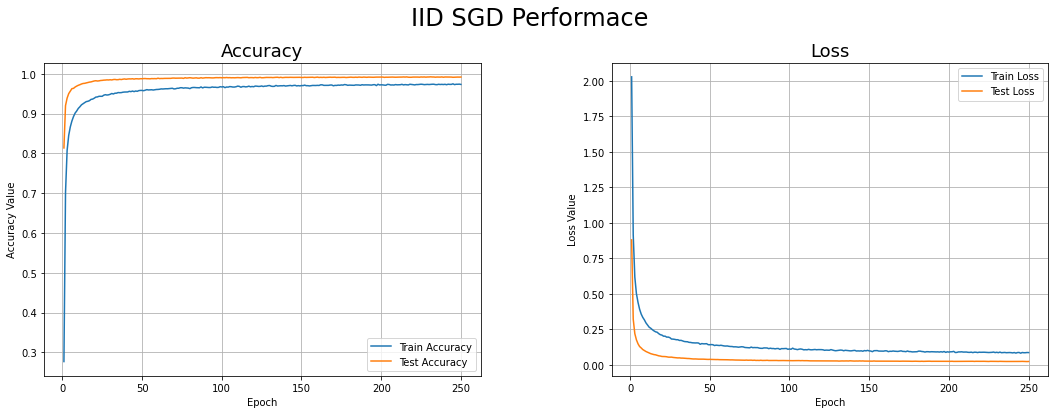

In [ ]:
f = plot(epochs, "IID SGD Performace", iid_sgd_history)

In [ ]:
save(iid_sgd_history, server_model, f, "IID_SGD")

In [ ]:
client_models, client_optimizers = make_clients(n)
server_model = MnistNet()

In [ ]:
noniid_sgd_history = fit_federated(epochs, client_models, client_optimizers, noniid_dls, 
                                server_model, server_opt, server_lr, test_dl, criterion)

Epoch 1 - train_loss : 0.6029, train_acc : 0.7845, test_loss : 2.0877, test_acc : 0.3766
Epoch 2 - train_loss : 0.3101, train_acc : 0.9039, test_loss : 1.4854, test_acc : 0.6032
Epoch 3 - train_loss : 0.2322, train_acc : 0.9320, test_loss : 1.1135, test_acc : 0.6523
Epoch 4 - train_loss : 0.1822, train_acc : 0.9462, test_loss : 0.8393, test_acc : 0.7553
Epoch 5 - train_loss : 0.1572, train_acc : 0.9557, test_loss : 0.6756, test_acc : 0.8083
Epoch 6 - train_loss : 0.1452, train_acc : 0.9589, test_loss : 0.5510, test_acc : 0.8518
Epoch 7 - train_loss : 0.1271, train_acc : 0.9645, test_loss : 0.4697, test_acc : 0.8679
Epoch 8 - train_loss : 0.1203, train_acc : 0.9660, test_loss : 0.4104, test_acc : 0.8859
Epoch 9 - train_loss : 0.1109, train_acc : 0.9693, test_loss : 0.3485, test_acc : 0.9080
Epoch 10 - train_loss : 0.1049, train_acc : 0.9718, test_loss : 0.3281, test_acc : 0.9100
Epoch 11 - train_loss : 0.0981, train_acc : 0.9727, test_loss : 0.2921, test_acc : 0.9233
Epoch 12 - train_lo

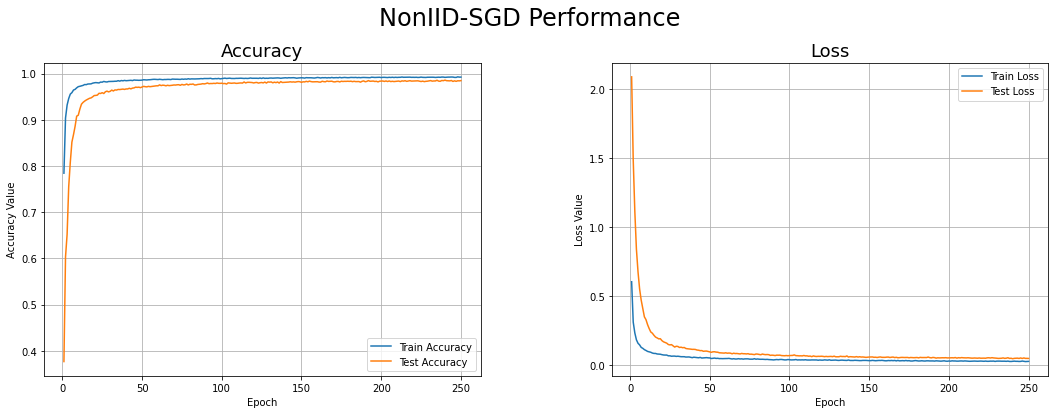

In [ ]:
f = plot(epochs, "NonIID-SGD Performance", noniid_sgd_history)

In [ ]:
save(noniid_sgd_history, server_model, f, "NonIID_SGD")

In [ ]:
client_models, client_optimizers = make_clients(n)
server_model = MnistNet()
server_opt = 'adam'
server_lr = 0.003
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
demon = True

In [ ]:
noniid_demon_adam_history = fit_federated(epochs, client_models, client_optimizers, noniid_dls, 
                  server_model, server_opt, server_lr, test_dl, criterion,
                  beta1, beta2, epsilon, demon)

Epoch 1 - train_loss : 0.6313, train_acc : 0.7675, test_loss : 4.3833, test_acc : 0.3058
Epoch 2 - train_loss : 0.3649, train_acc : 0.9162, test_loss : 1.3799, test_acc : 0.5610
Epoch 3 - train_loss : 0.2440, train_acc : 0.9311, test_loss : 0.9075, test_acc : 0.7320
Epoch 4 - train_loss : 0.2174, train_acc : 0.9407, test_loss : 0.5839, test_acc : 0.8044
Epoch 5 - train_loss : 0.1761, train_acc : 0.9516, test_loss : 0.4115, test_acc : 0.8791
Epoch 6 - train_loss : 0.1559, train_acc : 0.9588, test_loss : 0.3454, test_acc : 0.8979
Epoch 7 - train_loss : 0.1407, train_acc : 0.9613, test_loss : 0.3145, test_acc : 0.8996
Epoch 8 - train_loss : 0.1315, train_acc : 0.9643, test_loss : 0.2833, test_acc : 0.9164
Epoch 9 - train_loss : 0.1307, train_acc : 0.9650, test_loss : 0.2662, test_acc : 0.9289
Epoch 10 - train_loss : 0.1226, train_acc : 0.9671, test_loss : 0.2630, test_acc : 0.9332
Epoch 11 - train_loss : 0.1161, train_acc : 0.9694, test_loss : 0.2599, test_acc : 0.9301
Epoch 12 - train_lo

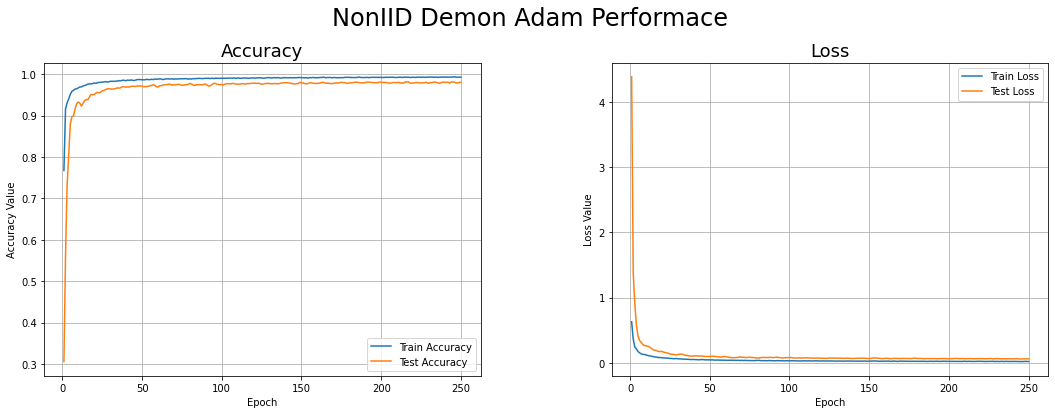

In [ ]:
f = plot(epochs, "NonIID Demon Adam Performace", noniid_demon_adam_history)

In [ ]:
save(noniid_demon_adam_history, server_model, f, "NonIID_Demon_Adam")

In [ ]:
client_models, client_optimizers = make_clients(n)
server_model = MnistNet()
compression = 'rTopk'
server_lr = 0.001
sparsity = 0.99
warmup = 5

In [ ]:
noniid_demon_adam_rtopk_history = fit_federated(epochs, client_models, client_optimizers, noniid_dls, 
                  server_model, server_opt, server_lr, test_dl, criterion,
                  beta1, beta2 , epsilon , demon , compression , sparsity , warmup)

Epoch 1 - train_loss : 0.6088, train_acc : 0.7874, test_loss : 2.2865, test_acc : 0.1436
Epoch 2 - train_loss : 0.5189, train_acc : 0.8272, test_loss : 2.2630, test_acc : 0.1504
Epoch 3 - train_loss : 0.4876, train_acc : 0.8391, test_loss : 2.2311, test_acc : 0.1906
Epoch 4 - train_loss : 0.4471, train_acc : 0.8582, test_loss : 2.1912, test_acc : 0.2593
Epoch 5 - train_loss : 0.4115, train_acc : 0.8715, test_loss : 2.1440, test_acc : 0.3734
Epoch 6 - train_loss : 0.3795, train_acc : 0.8830, test_loss : 2.0921, test_acc : 0.4471
Epoch 7 - train_loss : 0.3566, train_acc : 0.8897, test_loss : 2.0370, test_acc : 0.4680
Epoch 8 - train_loss : 0.3305, train_acc : 0.8997, test_loss : 1.9804, test_acc : 0.4690
Epoch 9 - train_loss : 0.3091, train_acc : 0.9062, test_loss : 1.9232, test_acc : 0.4562
Epoch 10 - train_loss : 0.2942, train_acc : 0.9103, test_loss : 1.8670, test_acc : 0.4454
Epoch 11 - train_loss : 0.2755, train_acc : 0.9166, test_loss : 1.8125, test_acc : 0.4331
Epoch 12 - train_lo

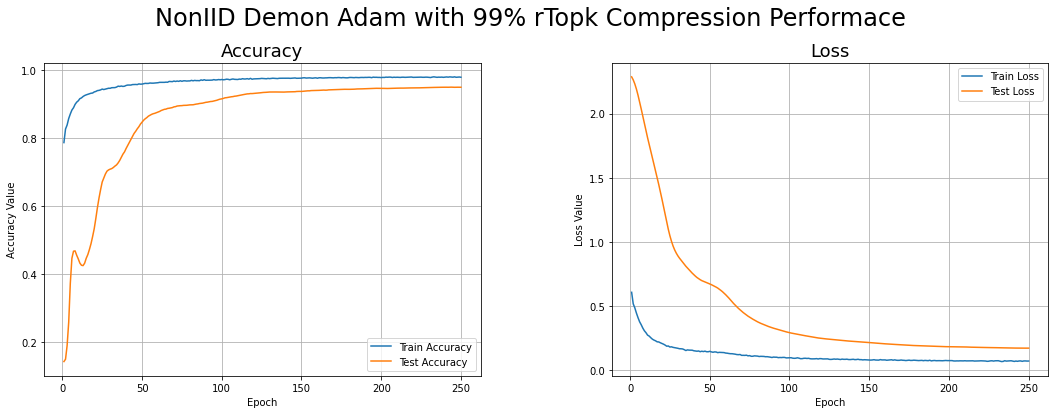

In [ ]:
f = plot(epochs, "NonIID Demon Adam with 99% rTopk Compression Performace", noniid_demon_adam_rtopk_history)

In [ ]:
save(noniid_demon_adam_rtopk_history, server_model, f, "NonIID_Demon_Adam_rTopk")

In [ ]:
client_models, client_optimizers = make_clients(n)
server_model = MnistNet()
server_opt = 'sgd'
server_lr = 0.1
compression = 'rTopk'
sparsity = 0.99
warmup = 5

In [ ]:
noniid_sgd_rtopk_history = fit_federated(epochs, client_models, client_optimizers, noniid_dls, 
                  server_model, server_opt, server_lr, test_dl, criterion,
                  compression = compression , sparsity = sparsity , warmup = warmup)

Epoch 1 - train_loss : 0.5863, train_acc : 0.7930, test_loss : 2.3125, test_acc : 0.1119
Epoch 2 - train_loss : 0.5189, train_acc : 0.8258, test_loss : 2.2879, test_acc : 0.1422
Epoch 3 - train_loss : 0.4766, train_acc : 0.8432, test_loss : 2.2325, test_acc : 0.2768
Epoch 4 - train_loss : 0.4243, train_acc : 0.8614, test_loss : 2.1346, test_acc : 0.3372
Epoch 5 - train_loss : 0.3625, train_acc : 0.8863, test_loss : 2.0073, test_acc : 0.4456
Epoch 6 - train_loss : 0.3136, train_acc : 0.9031, test_loss : 1.8586, test_acc : 0.4617
Epoch 7 - train_loss : 0.2760, train_acc : 0.9148, test_loss : 1.6572, test_acc : 0.4840
Epoch 8 - train_loss : 0.2494, train_acc : 0.9227, test_loss : 1.4533, test_acc : 0.5017
Epoch 9 - train_loss : 0.2306, train_acc : 0.9290, test_loss : 1.1485, test_acc : 0.6720
Epoch 10 - train_loss : 0.2068, train_acc : 0.9368, test_loss : 1.0142, test_acc : 0.6792
Epoch 11 - train_loss : 0.1989, train_acc : 0.9406, test_loss : 0.9241, test_acc : 0.7093
Epoch 12 - train_lo

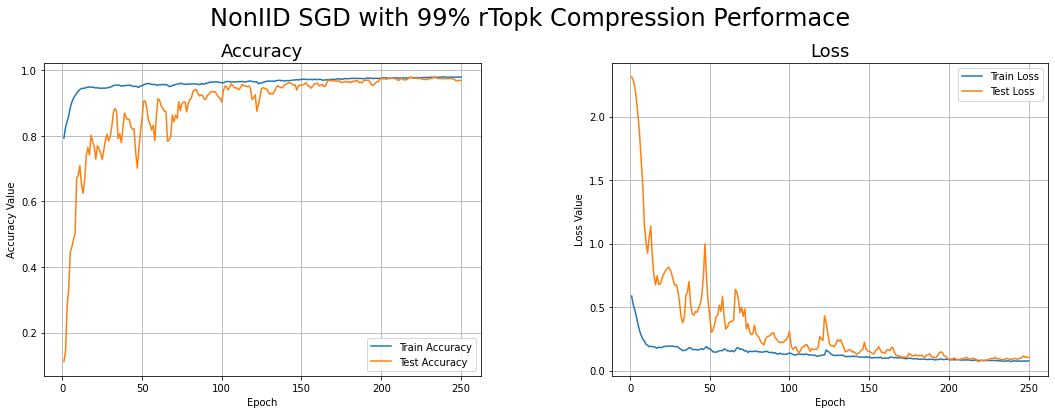

In [ ]:
f = plot(epochs, "NonIID SGD with 99% rTopk Compression Performace", noniid_sgd_rtopk_history)

In [ ]:
save(noniid_sgd_rtopk_history, server_model, f, "NonIID_SGD_rTopk")